#### GMM Clustering By Priti Sharma

In [28]:
## Applied GMM clustering on Yahoo live stock data for some selected set of stocks.
## Also Calculated Akaike information criterion (AIC) or the Bayesian information criterion (BIC) 
## to find the optimal number of clusters.


In [29]:
from pandas_datareader import data 
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import numpy as np
import plotly.graph_objects as go
from sklearn.mixture import GaussianMixture


In [30]:
companies_dict = {
    'Amazon':'AMZN',
    'Apple':'AAPL',
    'Walgreen':'WBA',
    'Northrop Grumman':'NOC',
    'Boeing':'BA',
    'Lockheed Martin':'LMT',
    'McDonalds':'MCD',
    'Intel':'INTC',
    'Synopsys':'SNPS',
    'IBM':'IBM',
    'Texas Instruments':'TXN',
    'MasterCard':'MA',
    'Microsoft':'MSFT',
    'General Electrics':'GE',
    'Cadence':'CDNS',
    'American Express':'AXP',
    'Pepsi':'PEP',
    'Coca Cola':'KO',
    'Johnson & Johnson':'JNJ',
    'Toyota':'TM',
    'Honda':'HMC',
    'ABB':'ABB',
    'Sony':'SONY',
    'Exxon':'XOM',
    'Chevron':'CVX',
    'Valero Energy':'VLO',
    'Ford':'F',
    'Bank of America':'BAC',
    'Facebook': 'FB',
    'American Airlines': 'AAL',
    'Tesla': 'TSLA',
    'AMC Ent': 'AMC',
    'Disney': 'DIS',
    'Pfizer': 'PFE',
    'Carnival': 'CCL',
    'Nokia': 'NOK',
    'AliBaba': 'BABA',
    'Netflix': 'NFLX',
    'Delta Airlines': 'DAL',
    'Palantir': 'PLTR',
    'Bank Of Maerica': 'BAC',
    'Blackberry': 'BB',
    'Nvidia': 'NVDA',
    'Starbucks': 'SBUX',
    'AMD': 'AMD',
    'ATT': 'T',
    'Twitter': 'TWTR',
    'GM': 'GM',
    'GE': 'GE',
    'Boeing': 'BA',
    'Walmart': 'WMT',
    'Paypal': 'PYPL',
    'Marathon Oil': 'MRO',
    'JetBlue Airways': 'JBLU',
    'Nike': 'NKE',
    'Kroger': 'KR',
    'National Beverage': 'FIZZ',
    'Dave Busters': 'PLAY'
}

import requests
import io
companies_dict.values()


dict_values(['AMZN', 'AAPL', 'WBA', 'NOC', 'BA', 'LMT', 'MCD', 'INTC', 'SNPS', 'IBM', 'TXN', 'MA', 'MSFT', 'GE', 'CDNS', 'AXP', 'PEP', 'KO', 'JNJ', 'TM', 'HMC', 'ABB', 'SONY', 'XOM', 'CVX', 'VLO', 'F', 'BAC', 'FB', 'AAL', 'TSLA', 'AMC', 'DIS', 'PFE', 'CCL', 'NOK', 'BABA', 'NFLX', 'DAL', 'PLTR', 'BAC', 'BB', 'NVDA', 'SBUX', 'AMD', 'T', 'TWTR', 'GM', 'GE', 'WMT', 'PYPL', 'MRO', 'JBLU', 'NKE', 'KR', 'FIZZ', 'PLAY'])

In [31]:
df = web.DataReader(list(companies_dict.values()),'yahoo',start='2019-01-01',end='2021-07-5')
print(df)

Attributes    Adj Close                                                 \
Symbols            AMZN        AAPL        WBA         NOC          BA   
Date                                                                     
2019-01-02  1539.130005   38.326298  60.846283  234.309158  314.645142   
2019-01-03  1500.280029   34.508709  60.211361  228.174927  302.100555   
2019-01-04  1575.390015   35.981865  62.214520  235.764282  317.822571   
2019-01-07  1629.510010   35.901779  62.572247  237.599838  318.823395   
2019-01-08  1656.579956   36.586170  63.824211  238.674500  330.891937   
...                 ...         ...        ...         ...         ...   
2021-06-28  3443.889893  134.382248  51.206039  367.023682  239.960007   
2021-06-29  3448.139893  135.927673  50.990269  357.208923  235.759995   
2021-06-30  3440.159912  136.555817  51.598347  360.302032  239.559998   
2021-07-01  3432.969971  136.864899  47.773338  364.455963  239.729996   
2021-07-02  3510.979980  139.546967  4

                     Returns  Variance
Attributes Symbols                    
Adj Close  AMZN     0.001491  0.019047
           AAPL     0.002311  0.022692
           WBA     -0.000120  0.023696
           NOC      0.000886  0.018931
           BA       0.000276  0.038170
...                      ...       ...
Volume     JBLU     0.086889  0.521377
           NKE      0.069394  0.420352
           KR       0.079908  0.496717
           FIZZ     0.150275  0.810259
           PLAY     0.127396  0.783111

[330 rows x 2 columns]


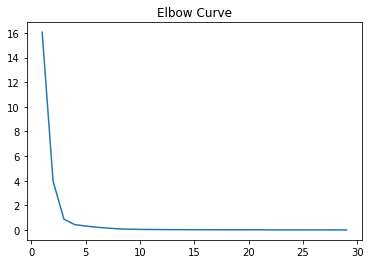

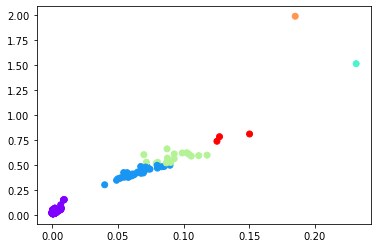

In [32]:
from math import sqrt
from sklearn.cluster import KMeans
#df.head
#print(df.columns)
#Calculating annual mean returns and variances
#returns = df.pct_change().mean() * 252
#variance = df.pct_change().std() * sqrt(252)
returns = df.pct_change().mean() 
variance = df.pct_change().std() 


returns.columns = ["Returns"]
variance.columns = ["Variance"]
#Concatenating the returns and variances into a single data-frame
ret_var = pd.concat([returns, variance], axis = 1).dropna()
ret_var.columns = ["Returns","Variance"]


print(ret_var)



X = ret_var.values #Converting ret_var into nummpy array
#X = ret_var
sse = []
for k in range(1,30):
    
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    
    sse.append(kmeans.inertia_) #SSE for each n_clusters
plt.plot(range(1,30), sse)
plt.title("Elbow Curve")
plt.show()

kmeans = KMeans(n_clusters = 6).fit(X)
centroids = kmeans.cluster_centers_
plt.scatter(X[:,0],X[:,1], c = kmeans.labels_, cmap ="rainbow")
plt.show()





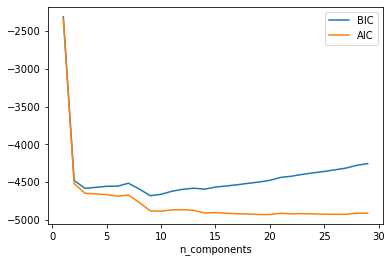

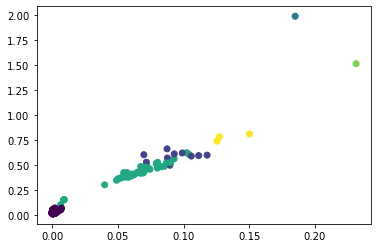

In [33]:
# training gaussian mixture model
# Using predict method to get the lists of points and the respective clusters.
# Train the model using optimal number of clusters, in this case 6.

Y =  ret_var.values
n_components = np.arange(1, 30)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(Y) for n in n_components]
plt.plot(n_components, [m.bic(Y) for m in models], label='BIC')
plt.plot(n_components, [m.aic(Y) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');
plt.show()


gmm = GaussianMixture(n_components=6)
gmm.fit(Y)
labels = gmm.predict(Y)
plt.scatter(Y[:, 0], Y[:, 1], c=labels, cmap='viridis');



In [34]:
##Gaussian mixture models considers stock variance and returns. 
##And the probability how a data point belongs to each of the K clusters, as show in the scatter plot.